# *E. coli* Simulations

In [1]:
# Make sure notebook runs out of vivarium-ecoli directory
import sys, os
notebook_path = sys.path[0][:sys.path[0].index('notebooks')]
sys.path.append(notebook_path)
os.chdir(sys.path[-1])
cwd = os.getcwd()

In [6]:
import os
from ecoli.experiments.ecoli_master_sim import EcoliSim, CONFIG_DIR_PATH
from vivarium.core.engine import pf
from vivarium.plots.simulation_output import plot_variables

In [3]:
sim = EcoliSim.from_file(CONFIG_DIR_PATH + "no_partition.json")
sim.total_time = 10
sim.divide = False
sim.progress_bar = False
sim.log_updates = False
sim.raw_output = False


## run simulation

In [4]:
output = sim.run()


Simulation ID: 89481738-24b8-11ec-a99b-8c85908ac627
Created: 10/03/2021 at 19:12:36
Completed in 24.52 seconds


In [9]:
print(output['listeners']['mass'].keys())

dict_keys(['cell_mass', 'dry_mass', 'water_mass', 'rnaMass', 'rRnaMass', 'tRnaMass', 'mRnaMass', 'dnaMass', 'proteinMass', 'smallMoleculeMass', 'volume', 'proteinMassFraction', 'rnaMassFraction', 'growth', 'instantaniousGrowthRate', 'dryMassFoldChange', 'proteinMassFoldChange', 'rnaMassFoldChange', 'smallMoleculeFoldChange'])


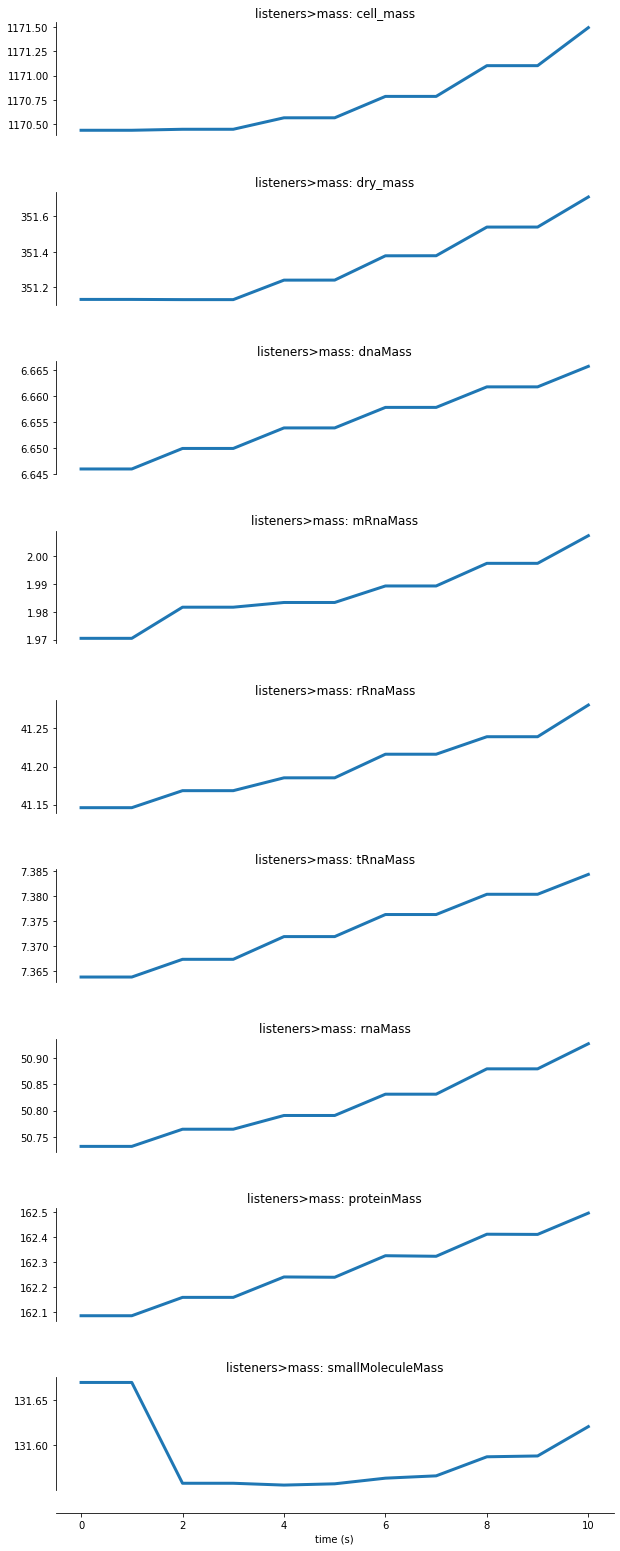

In [8]:
# plot 
fig = plot_variables(
    output, 
    variables=[
        ('listeners', 'mass', 'cell_mass'), 
        ('listeners', 'mass', 'dry_mass'), 
        ('listeners', 'mass', 'dnaMass'), 
        ('listeners', 'mass', 'mRnaMass'), 
        ('listeners', 'mass', 'rRnaMass'), 
        ('listeners', 'mass', 'tRnaMass'), 
        ('listeners', 'mass', 'rnaMass'), 
        ('listeners', 'mass', 'proteinMass'), 
        ('listeners', 'mass', 'smallMoleculeMass'), 
    ],
    column_width=10, row_height=3, row_padding=0.5)